#### First of all let's import the libraries we are going to use

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

! pip install folium==0.5.0
import folium # plotting library
from pandas.io.json import json_normalize
print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 112 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 2.2 MB/s eta 0:00:011
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=1b42ea7f6ed3aee40010daa1091cfa0eb3d4cb8f24fdc00ce87dbfb30c95e317
  Stored in directory: /home/jovyan/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


#### My Foursquare credentials are listed below

In [2]:
CLIENT_ID = 'O1BURTX3GNG5JZNHQWEMLQ0JWVN3GZWGBNFMG4IGNUL2PZE1'
CLIENT_SECRET = 'NY3UJB4WXWLULRGAOTPA5LFBYN5NTK5TFGZE3KFJPJJVAMRK'
ACCESS_TOKEN = 'JDPIU02M2ZK2JLSQPOSCXOKBOZLLCVY1OBFUMNJVR4ZSJLBP'
VERSION = '20180604'
LIMIT = 100
radius = 10000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: O1BURTX3GNG5JZNHQWEMLQ0JWVN3GZWGBNFMG4IGNUL2PZE1
CLIENT_SECRET:NY3UJB4WXWLULRGAOTPA5LFBYN5NTK5TFGZE3KFJPJJVAMRK


#### First of all we are going to create a map of Greece and take a look in the areas we are going to work on 

In [3]:
address = 'Athens, EU'

geolocator = Nominatim(user_agent="gr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Athens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Athens are 37.978075, 23.7564839.


In [4]:
# create map of Athens using latitude and longitude values
world_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# display world map
world_map

#### Let's search how many Seafood places appear on our map

In [5]:
search_query = 'Seafood'
print(search_query + ' .... OK!')

Seafood .... OK!


#### Through Foursquare we will acquire a link of all the seafood places in 10km radius

In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=O1BURTX3GNG5JZNHQWEMLQ0JWVN3GZWGBNFMG4IGNUL2PZE1&client_secret=NY3UJB4WXWLULRGAOTPA5LFBYN5NTK5TFGZE3KFJPJJVAMRK&ll=37.978075,23.7564839&oauth_token=JDPIU02M2ZK2JLSQPOSCXOKBOZLLCVY1OBFUMNJVR4ZSJLBP&v=20180604&query=Seafood&radius=10000&limit=100'

#### Next we'll put them in a dataframe

In [7]:
results = requests.get(url).json()
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10e951735', 'name': 'F...",False,52c7e9d911d2d8f968196104,Αγιου Δημητριου 301,GR,Άγιος Δημήτριος,Ελλάδα,NaN,6701,"[Αγιου Δημητριου 301, 173 42 Άγιος Δημήτριος, ...","[{'label': 'display', 'lat': 37.92373017388262...",37.923730,23.723645,NaN,173 42,Αττική,frozen seafood (θαλάσσιος κόσμος),v-1612361556,NaN
1,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",False,5a15468620795519239a41e6,Λ. Αγίας Βαρβάρας 146,GR,Άγιος Δημήτριος,Ελλάδα,NaN,6349,"[Λ. Αγίας Βαρβάρας 146, 173 42 Άγιος Δημήτριος...","[{'label': 'display', 'lat': 37.92666449250438...",37.926664,23.725145,NaN,173 42,Αττική,Keros Seafood Restaurant,v-1612361556,NaN
2,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",False,55893f5d498ea3f013dd5e83,NaN,GR,NaN,Ελλάδα,NaN,7983,NaN,"[{'label': 'display', 'lat': 38.03953860728480...",38.039539,23.803386,NaN,NaN,NaN,Oceano seafood & sushi bar,v-1612361556,NaN
3,"[{'id': '53d6c1b0e4b02351e88a83d8', 'name': 'F...",False,52ee3ea911d20b2090cfe05e,Λεωφόρος Αγίας Βαρβάρας 146,GR,Άγιος Δημήτριος,Ελλάδα,NaN,6417,"[Λεωφόρος Αγίας Βαρβάρας 146, 173 42 Άγιος Δημ...","[{'label': 'display', 'lat': 37.92627799926027...",37.926278,23.724399,NaN,173 42,Αττική,Keros Seafood,v-1612361556,127107690
4,"[{'id': '4bf58dd8d48988d10e951735', 'name': 'F...",False,4db36ab44df05e5aaacb5675,NaN,GR,Moschato,Ελλάδα,NaN,7425,"[Moschato, Αττική]","[{'label': 'display', 'lat': 37.950895, 'lng':...",37.950895,23.679220,NaN,NaN,Αττική,Kontoveros - SeaFood Club,v-1612361556,NaN


#### We know that all the information is in the items key so before we proceed, let's borrow the get_category_type function from the Foursquare lab 2-2-1 and print our filtered dataframe

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the shop
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,frozen seafood (θαλάσσιος κόσμος),Fish Market,Αγιου Δημητριου 301,GR,Άγιος Δημήτριος,Ελλάδα,NaN,6701,"[Αγιου Δημητριου 301, 173 42 Άγιος Δημήτριος, ...","[{'label': 'display', 'lat': 37.92373017388262...",37.923730,23.723645,NaN,173 42,Αττική,52c7e9d911d2d8f968196104
1,Keros Seafood Restaurant,Seafood Restaurant,Λ. Αγίας Βαρβάρας 146,GR,Άγιος Δημήτριος,Ελλάδα,NaN,6349,"[Λ. Αγίας Βαρβάρας 146, 173 42 Άγιος Δημήτριος...","[{'label': 'display', 'lat': 37.92666449250438...",37.926664,23.725145,NaN,173 42,Αττική,5a15468620795519239a41e6
2,Oceano seafood & sushi bar,Seafood Restaurant,NaN,GR,NaN,Ελλάδα,NaN,7983,NaN,"[{'label': 'display', 'lat': 38.03953860728480...",38.039539,23.803386,NaN,NaN,NaN,55893f5d498ea3f013dd5e83
3,Keros Seafood,Fish Taverna,Λεωφόρος Αγίας Βαρβάρας 146,GR,Άγιος Δημήτριος,Ελλάδα,NaN,6417,"[Λεωφόρος Αγίας Βαρβάρας 146, 173 42 Άγιος Δημ...","[{'label': 'display', 'lat': 37.92627799926027...",37.926278,23.724399,NaN,173 42,Αττική,52ee3ea911d20b2090cfe05e
4,Kontoveros - SeaFood Club,Fish Market,NaN,GR,Moschato,Ελλάδα,NaN,7425,"[Moschato, Αττική]","[{'label': 'display', 'lat': 37.950895, 'lng':...",37.950895,23.679220,NaN,NaN,Αττική,4db36ab44df05e5aaacb5675
5,Trata,Fish Taverna,Θεμιστοκλέους 8,GR,Αθήνα,Ελλάδα,Νικηταρά,2345,"[Θεμιστοκλέους 8 (Νικηταρά), 106 78 Αθήνα, Αττ...","[{'label': 'display', 'lat': 37.98421, 'lng': ...",37.984210,23.730906,Athens,106 78,Αττική,50e43261e4b019f65aa6d9b7
6,Stalati,Seafood Restaurant,Λεωφόρος Συγγρού 303,GR,Παλαιό Φάληρο,Ελλάδα,Δημοσθένους,6338,"[Λεωφόρος Συγγρού 303 (Δημοσθένους), 175 64 Πα...","[{'label': 'display', 'lat': 37.942976, 'lng':...",37.942976,23.699623,NaN,175 64,Αττική,5c56e72e6fd626002c7e842d
7,Damianos,Seafood Restaurant,Βασιλέως Γεωργίου Β´ 34,GR,Χαλάνδρι,Ελλάδα,NaN,5991,"[Βασιλέως Γεωργίου Β´ 34, 152 33 Χαλάνδρι, Αττ...","[{'label': 'display', 'lat': 38.02380113811412...",38.023801,23.792506,NaN,152 33,Αττική,54ba67ed498ea0b841510dea


#### Finally we will generate a map of the Seafood places with blue dots

In [9]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map 

# add the Seafood shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### As it seems Seafood places are not very popular in Athens so we will explore the area to get a taste of what shops are there

***Exploring Athens***

#### We will acquire a new link from Foursquare to explore the shops

In [10]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
results = requests.get(url).json()
'There are {} shops around .'.format(len(results['response']['groups'][0]['items']))

'There are 100 shops around .'

#### We'll get a relevant part of JSON

In [11]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '5c1ea4c92db4a9002c49a1f1',
  'name': 'Lot51',
  'location': {'address': 'Παπαδιαμαντοπούλου 24Β',
   'crossStreet': 'Νυμφαίου',
   'lat': 37.97887634753193,
   'lng': 23.75601348499129,
   'labeledLatLngs': [{'label': 'display',
     'lat': 37.97887634753193,
     'lng': 23.75601348499129}],
   'distance': 98,
   'postalCode': '115 28',
   'cc': 'GR',
   'neighborhood': 'Ιλίσια',
   'city': 'Αθήνα',
   'state': 'Αττική',
   'country': 'Ελλάδα',
   'formattedAddress': ['Παπαδιαμαντοπούλου 24Β (Νυμφαίου)',
    '115 28 Αθήνα, Αττική',
    'Ελλάδα']},
  'categories': [{'id': '4bf58dd8d48988d16d941735',
    'name': 'Café',
    'pluralName': 'Cafés',
    'shortName': 'Café',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []

#### Process JSON and convert it to a clean dataframe


In [12]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Lot51,Café,Παπαδιαμαντοπούλου 24Β,GR,Αθήνα,Ελλάδα,Νυμφαίου,98,"[Παπαδιαμαντοπούλου 24Β (Νυμφαίου), 115 28 Αθή...","[{'label': 'display', 'lat': 37.97887634753193...",37.978876,23.756013,Ιλίσια,115 28,Αττική,5c1ea4c92db4a9002c49a1f1
1,Megaron - Athens Concert Hall (Μέγαρο Μουσικής...,Concert Hall,Λεωφ. Βασιλίσσης Σοφίας 60,GR,Αθήνα,Ελλάδα,Πέτρου Κόκκαλη,375,"[Λεωφ. Βασιλίσσης Σοφίας 60 (Πέτρου Κόκκαλη), ...","[{'label': 'display', 'lat': 37.98099305568196...",37.980993,23.754330,NaN,115 21,Αττική,4afadb6af964a520171922e3
2,Concert Hall Gardens (Κήπος Μεγάρου Μουσικής Α...,Park,Λεωφ. Βασιλίσσης Σοφίας,GR,Αθήνα,Ελλάδα,στο Μέγαρο Μουσικής Αθηνών,500,[Λεωφ. Βασιλίσσης Σοφίας (στο Μέγαρο Μουσικής ...,"[{'label': 'display', 'lat': 37.98167048352192...",37.981670,23.753060,NaN,115 21,Αττική,4fcc79a3e4b0a2c79b1843a3
3,CV Distiller,Whisky Bar,Χατζηγιάννη Μέξη 7,GR,Αθήνα,Ελλάδα,NaN,466,"[Χατζηγιάννη Μέξη 7, 115 28 Αθήνα, Αττική, Ελλ...","[{'label': 'display', 'lat': 37.97627010645586...",37.976270,23.751681,NaN,115 28,Αττική,54aed3fe498e6c5dd5fe325b
4,Simul,Modern European Restaurant,Υψηλάντου 63,GR,Αθήνα,Ελλάδα,NaN,527,"[Υψηλάντου 63, 115 21 Αθήνα, Αττική, Ελλάδα]","[{'label': 'display', 'lat': 37.9778216565937,...",37.977822,23.750482,Κολωνάκι,115 21,Αττική,5679c79c498e5a11fca9e97e
5,Espressaki,Coffee Shop,Άγγελου Πυρρή 3,GR,Αθήνα,Ελλάδα,Ευήνου,700,"[Άγγελου Πυρρή 3 (Ευήνου), 115 27 Αθήνα, Αττικ...","[{'label': 'display', 'lat': 37.98353842355069...",37.983538,23.760446,NaN,115 27,Αττική,4ef9b798c512f2277a858659
6,Γουρ Γουρ,Souvlaki Shop,Ευφρονίου 71,GR,Αθήνα,Ελλάδα,NaN,668,"[Ευφρονίου 71, 161 21 Αθήνα, Αττική, Ελλάδα]","[{'label': 'display', 'lat': 37.97216777977839...",37.972168,23.755125,Ιλίσια,161 21,Αττική,591a0016ad910e51c7764921
7,5φ,Magirio,Διοχάρους 31,GR,Καισαριανή,Ελλάδα,NaN,641,"[Διοχάρους 31, 161 21 Καισαριανή, Αττική, Ελλάδα]","[{'label': 'display', 'lat': 37.97272818671448...",37.972728,23.753772,Ilisia,161 21,Αττική,4f293b01e4b05879eab63d6b
8,Hilton Athens,Hotel,Λεωφ. Βασιλίσσης Σοφίας 46,GR,Αθήνα,Ελλάδα,NaN,595,"[Λεωφ. Βασιλίσσης Σοφίας 46, 115 28 Αθήνα, Αττ...","[{'label': 'display', 'lat': 37.97605761304020...",37.976058,23.750193,NaN,115 28,Αττική,4adcdaddf964a5209d5721e3
9,Πεϊνιρλί Ιωνίας,Bakery,Πανόρμου 3,GR,Αμπελόκηποι,Ελλάδα,Λεωφ. Αλεξάνδρας,1055,"[Πανόρμου 3 (Λεωφ. Αλεξάνδρας), 115 22 Αμπελόκ...","[{'label': 'display', 'lat': 37.98749868121609...",37.987499,23.757829,NaN,115 22,Αττική,4bfbb9d18f32ef3b202605aa


#### As we can see, the top result is Coffee shops so let's count the values just to be sure

In [13]:
dataframe_count=dataframe_filtered["categories"].value_counts()
dataframe_count

Coffee Shop                   12
Historic Site                  8
Café                           6
Dessert Shop                   5
Bar                            4
Park                           3
Boutique                       3
Gourmet Shop                   3
Bakery                         3
Meze Restaurant                2
Theater                        2
Italian Restaurant             2
Bookstore                      2
Souvlaki Shop                  2
Wine Bar                       2
Hotel                          2
Falafel Restaurant             2
Pizza Place                    2
Ice Cream Shop                 2
Hill                           2
History Museum                 2
Cocktail Bar                   2
Pedestrian Plaza               2
Roof Deck                      1
Bagel Shop                     1
Other Great Outdoors           1
Kafenio                        1
Greek Restaurant               1
Indie Movie Theater            1
Middle Eastern Restaurant      1
Planetariu

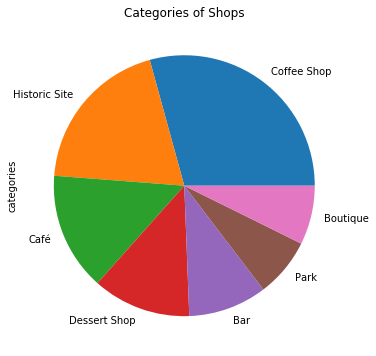

In [14]:
dataframe_count.head(7).plot(kind='pie',figsize=(15,6),subplots=True)
plt.title('Categories of Shops')
plt.show()

#### We will generate our map again with the different shops above marked in blue

In [15]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map 

# add shops to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

#### Things start to get interesting. Let's have a look on ****trending**** shops at this time.Now, depending on when we run the below code, we might get different shops since the shops with the highest foot traffic are fetched live

In [16]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()

In [17]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [18]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco

    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)
venues_map

'Cannot generate visual as no trending venues are available at the moment!'

#### If there aren't any trending shops at the moment we'll focus on the **Coffee Shops** of Athens

In [19]:
search_query = 'Coffee'
print(search_query + ' .... OK!')

Coffee .... OK!


#### We'll define the corresponding URL


In [20]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=O1BURTX3GNG5JZNHQWEMLQ0JWVN3GZWGBNFMG4IGNUL2PZE1&client_secret=NY3UJB4WXWLULRGAOTPA5LFBYN5NTK5TFGZE3KFJPJJVAMRK&ll=37.978075,23.7564839&oauth_token=JDPIU02M2ZK2JLSQPOSCXOKBOZLLCVY1OBFUMNJVR4ZSJLBP&v=20180604&query=Coffee&radius=10000&limit=100'

#### Send the GET Request and examine the results


In [21]:
results = requests.get(url).json()
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,56476000498e93b42b8537e4,Γρηγοριου Αυξεντιου 9,GR,Ζωγράφος,Ελλάδα,NaN,319,"[Γρηγοριου Αυξεντιου 9, 157 72 Ζωγράφος, Αττική]","[{'label': 'display', 'lat': 37.97688650550267...",37.976887,23.759793,Ανω Ιλίσια,157 72,Αττική,Ennea St Coffee,v-1612361562,NaN
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,53738674498e46db96919395,25ης Μαρτίου 22,GR,Νέο Ψυχικό,Ελλάδα,NaN,3924,"[25ης Μαρτίου 22, 154 51 Νέο Ψυχικό, Αττική]","[{'label': 'display', 'lat': 38.00503999437289...",38.005040,23.785298,Νέο Ψυχικό,154 51,Αττική,Kudu Coffee Roasters,v-1612361562,NaN
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4f926df2e4b0e29f5423061a,Ηροδότου 24Α,GR,Αθήνα,Ελλάδα,NaN,1258,"[Ηροδότου 24Α, Αθήνα, Αττική]","[{'label': 'display', 'lat': 37.97771852087759...",37.977719,23.742152,NaN,NaN,Αττική,Coffee Box,v-1612361562,NaN
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,51b9980c498e8ff70ec61cb9,Σόλωνος 64,GR,Αθήνα,Ελλάδα,NaN,1785,"[Σόλωνος 64, 106 79 Αθήνα, Αττική]","[{'label': 'display', 'lat': 37.9808821983588,...",37.980882,23.736444,NaN,106 79,Αττική,Mikel Coffee Company,v-1612361562,NaN
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,510a4710e4b0f0a7a983b188,Πανόρμου 97,GR,Αθήνα,Ελλάδα,Λαρίσης,1770,"[Πανόρμου 97 (Λαρίσης), Αθήνα, Αττική]","[{'label': 'display', 'lat': 37.99311350103371...",37.993114,23.763059,NaN,NaN,Αττική,Coffee Island,v-1612361562,NaN


In [22]:
# keep only columns that include shop name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Ennea St Coffee,Coffee Shop,Γρηγοριου Αυξεντιου 9,GR,Ζωγράφος,Ελλάδα,NaN,319,"[Γρηγοριου Αυξεντιου 9, 157 72 Ζωγράφος, Αττική]","[{'label': 'display', 'lat': 37.97688650550267...",37.976887,23.759793,Ανω Ιλίσια,157 72,Αττική,56476000498e93b42b8537e4
1,Kudu Coffee Roasters,Coffee Shop,25ης Μαρτίου 22,GR,Νέο Ψυχικό,Ελλάδα,NaN,3924,"[25ης Μαρτίου 22, 154 51 Νέο Ψυχικό, Αττική]","[{'label': 'display', 'lat': 38.00503999437289...",38.005040,23.785298,Νέο Ψυχικό,154 51,Αττική,53738674498e46db96919395
2,Coffee Box,Coffee Shop,Ηροδότου 24Α,GR,Αθήνα,Ελλάδα,NaN,1258,"[Ηροδότου 24Α, Αθήνα, Αττική]","[{'label': 'display', 'lat': 37.97771852087759...",37.977719,23.742152,NaN,NaN,Αττική,4f926df2e4b0e29f5423061a
3,Mikel Coffee Company,Coffee Shop,Σόλωνος 64,GR,Αθήνα,Ελλάδα,NaN,1785,"[Σόλωνος 64, 106 79 Αθήνα, Αττική]","[{'label': 'display', 'lat': 37.9808821983588,...",37.980882,23.736444,NaN,106 79,Αττική,51b9980c498e8ff70ec61cb9
4,Coffee Island,Coffee Shop,Πανόρμου 97,GR,Αθήνα,Ελλάδα,Λαρίσης,1770,"[Πανόρμου 97 (Λαρίσης), Αθήνα, Αττική]","[{'label': 'display', 'lat': 37.99311350103371...",37.993114,23.763059,NaN,NaN,Αττική,510a4710e4b0f0a7a983b188
5,Mikel Coffee Company,Coffee Shop,Λεωφ. Αλεξάνδρας 197,GR,Αμπελόκηποι,Ελλάδα,NaN,1026,"[Λεωφ. Αλεξάνδρας 197, Αμπελόκηποι, Αττική]","[{'label': 'display', 'lat': 37.98726521082700...",37.987265,23.757384,NaN,NaN,Αττική,57208cb6498ebf50546b64c0
6,Mr Bean Coffee Brewers,Coffee Shop,Εμ. Μπενακη 20,GR,Αθήνα,Ελλάδα,NaN,2298,"[Εμ. Μπενακη 20, Αθήνα, Αττική]","[{'label': 'display', 'lat': 37.98360955042584...",37.983610,23.731250,NaN,NaN,Αττική,56ed54a1498e1bc48d70301d
7,Coffee Island,Coffee Shop,Χαριλάου Τρικούπη 28,GR,Athens,Ελλάδα,Σόλωνος,2032,"[Χαριλάου Τρικούπη 28 (Σόλωνος), 106 79 Αττική...","[{'label': 'display', 'lat': 37.98324248450226...",37.983242,23.734267,Εξάρχεια,106 79,Αττική,52c65ab311d2bf50dd48a5d6
8,Coffee Island,Coffee Shop,Παπαδιαμαντοπούλου 77,GR,Αθήνα,Ελλάδα,NaN,499,"[Παπαδιαμαντοπούλου 77, Αθήνα, Αττική]","[{'label': 'display', 'lat': 37.98021959908161...",37.980220,23.761485,NaN,NaN,Αττική,54d7860e498e46fc5ad939ba
9,Coffee Island,Coffee Shop,Αγιου Κωνσταντινου 12,GR,Αθήνα,Ελλάδα,NaN,2744,"[Αγιου Κωνσταντινου 12, Αθήνα, Αττική]","[{'label': 'display', 'lat': 37.98446195426769...",37.984462,23.726276,NaN,NaN,Αττική,5450d62c498e1940a5f15023


#### At last let's visualize these items on the map around our location

In [23]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map 

# add the Coffee shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### We'll count the different coffee shops to get an idea of what is popular in our area

In [24]:
dataframe_filtered['name'].value_counts()

Coffee Island                         17
Mikel Coffee Company                   6
Coffee Lab                             4
Coffee Station                         1
Dizer Coffee Specialization            1
Coffee Box                             1
Coffee Avenue                          1
Coffee & Snack                         1
Coffee House Food&Drink                1
Ennea St Coffee                        1
Liondi Coffee & Wine (Λιόντι)          1
Coffee To Go!                          1
123 coffee & more                      1
For Coffee                             1
Kudu Coffee Roasters                   1
The coffee house                       1
Coffee Time                            1
CoffeeΜιξ Spesiality Coffee & More     1
Coffee Berry                           1
Coffee Point Of You                    1
Coffee Break                           1
Coffee Point                           1
Coffee Jar                             1
Mr Bean Coffee Brewers                 1
Yela coffee & mo

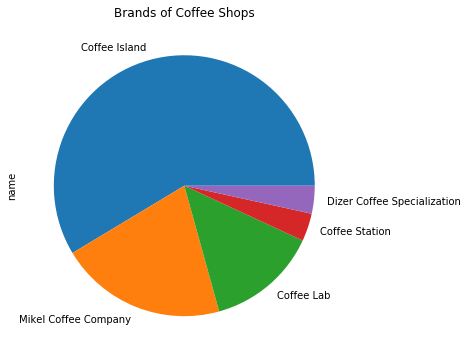

In [25]:
dataframe_filtered['name'].value_counts().head().plot(kind='pie',figsize=(15,6))
plt.title('Brands of Coffee Shops')
plt.show()

#### The vast majority of coffee shops consists of Coffee island then Mikel Coffee Company and Coffee Lab. So if we want to invest and open a new shop it would be best to open a Coffee Island or a Mikel Coffee Company Coffee shop.Also if we examine the map above, a great place to start would be near the Economic University of Athens or the National Technical University of Athens where there is heavy foot traffic especially from the students who attend the lectures

In [27]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)
folium.CircleMarker(
    [37.994158, 23.732002],
    radius=10,
    color='red',
    popup='Economical University of Athens',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)
folium.CircleMarker(
    [37.987325, 23.731689],
    radius=10,
    color='red',
    popup='National Technical University of Athens',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

### Thank you for your time
#### This notebook was created by Nikolas Vitsentzatos